*Загрузка датасета для обучения модели и разделение его на обучающую и тестовую выборки*

In [ ]:
import shutil
import os
import kagglehub
from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import cv2
from tensorflow import keras
from tensorflow.keras import layers

# === 1. Загрузка датасета из Kaggle ===
print("Начинаем загрузку датасета...")
path = kagglehub.dataset_download("dineshpiyasamara/geometric-shapes-dataset")
dataset_path = Path(path).resolve()
print(f"Датасет загружен по пути: {dataset_path}\n")

# === 2. Анализ структуры датасета ===
print("Анализируем структуру датасета...\n")

# Выводим содержимое корня
print("Содержимое корневой директории:")
for item in dataset_path.iterdir():
    item_type = 'файл' if item.is_file() else 'директория'
    print(f"!  {item.name} ({item_type})")

# Ищем реальную директорию с классами (может быть вложенной)
real_data_path = dataset_path
CLASS_NAMES = ["Circle", "Square", "Triangle"]  # Ожидаемые классы

for item in dataset_path.iterdir():
    if item.is_dir():
        subdirs = [d.name for d in item.iterdir() if d.is_dir()]
        if set(CLASS_NAMES).issubset(set(subdirs)):
            real_data_path = item
            print(f"!✓ Данные найдены в поддиректории: {real_data_path.name}")
            break

print(f"\nФактические поддиректории в {real_data_path.name}/:")
actual_subdirs = [d.name for d in real_data_path.iterdir() if d.is_dir()]
print(actual_subdirs)

dataset_path = real_data_path  # Переключаем на найденный путь

# === 3. Разделение на train/test ===
OUTPUT_DIR = Path("./geometric-shapes-split")  # Локальная директория (надёжнее, чем /tmp)
train_dir = OUTPUT_DIR / "train"
test_dir = OUTPUT_DIR / "test"

# Очищаем старые данные
if train_dir.exists():
    shutil.rmtree(train_dir)
if test_dir.exists():
    shutil.rmtree(test_dir)

# Создаём новые
train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)

print(f"\nОжидаемые классы: {CLASS_NAMES}")
print("Начинаем разделение...\n")

test_size = 0.2
random_state = 42

all_train_paths, all_test_paths = [], []
all_train_labels, all_test_labels = [], []

for class_name in CLASS_NAMES:
    class_dir = dataset_path / class_name

    if not class_dir.exists():
        print(f"!⚠️ Класс '{class_name}' не найден. Проверьте регистр.")
        continue

    # Собираем изображения с разными расширениями
    image_extensions = ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']
    images = []
    for ext in image_extensions:
        images.extend(class_dir.glob(f"*{ext}"))

    if len(images) == 0:
        print(f"!❌ Нет изображений в '{class_name}'. Пропускаем.")
        continue

    print(f"!Класс '{class_name}': {len(images)} изображений.")

    # Разделение
    train_images, test_images = train_test_split(
        images, test_size=test_size, random_state=random_state, shuffle=True
    )

    # Директории для класса
    train_class_dir = train_dir / class_name
    test_class_dir = test_dir / class_name
    train_class_dir.mkdir(exist_ok=True)
    test_class_dir.mkdir(exist_ok=True)

    # Копирование
    for img in train_images:
        shutil.copy(img, train_class_dir / img.name)
        all_train_paths.append(str(img))
        all_train_labels.append(class_name)
    for img in test_images:
        shutil.copy(img, test_class_dir / img.name)
        all_test_paths.append(str(img))
        all_test_labels.append(class_name)

    print(f"!  → {len(train_images)} в train, {len(test_images)} в test.")

print("\n✅ Разделение завершено!")
print(f"!Обучающая выборка: {train_dir}")
print(f"!Тестовая выборка:  {test_dir}")

Начинаем загрузку датасета...


100%|██████████| 27.9M/27.9M [00:02<00:00, 11.1MB/s]

Extracting files...


Датасет загружен по пути: /root/.cache/kagglehub/datasets/dineshpiyasamara/geometric-shapes-dataset/versions/1

Анализируем структуру датасета...

Содержимое корневой директории:
!  geometric shapes dataset (директория)
!✓ Данные найдены в поддиректории: geometric shapes dataset

Фактические поддиректории в geometric shapes dataset/:
['Triangle', 'Circle', 'Square']

Ожидаемые классы: ['Circle', 'Square', 'Triangle']
Начинаем разделение...

!Класс 'Circle': 10000 изображений.
!  → 8000 в train, 2000 в test.
!Класс 'Square': 10000 изображений.
!  → 8000 в train, 2000 в test.
!Класс 'Triangle': 10000 изображений.
!  → 8000 в train, 2000 в test.

✅ Разделение завершено!
!Обучающая выборка: geometric-shapes-split/train
!Тестовая выборка:  geometric-shapes-split/test


*Обучение и сохранение модели в файл my_model.keras*


Загрузка изображений для обучения...
Размер X_train: (24000, 128, 128, 1)
Размер X_test:  (6000, 128, 128, 1)


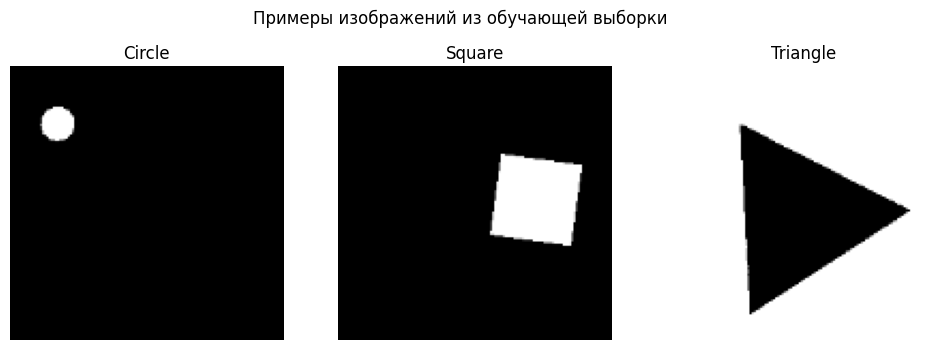

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.3849 - loss: 1.9872 - val_accuracy: 0.4781 - val_loss: 0.9964 - learning_rate: 1.0000e-04
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.4463 - loss: 1.1348 - val_accuracy: 0.5594 - val_loss: 0.9056 - learning_rate: 1.0000e-04
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.4766 - loss: 1.0262 - val_accuracy: 0.5821 - val_loss: 0.8427 - learning_rate: 1.0000e-04
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.5149 - loss: 0.9318 - val_accuracy: 0.6346 - val_loss: 0.7273 - learning_rate: 1.0000e-04
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5664 - loss: 0.8530 - val_accuracy: 0.6721 - val_loss: 0.6781 - learning_rate: 1.0000e-04
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.6099 - loss: 0.7750 - val_accuracy: 0.7208 - val_loss: 0.5956 - learning_rate: 1.0000e-04
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Загрузка файла начата!


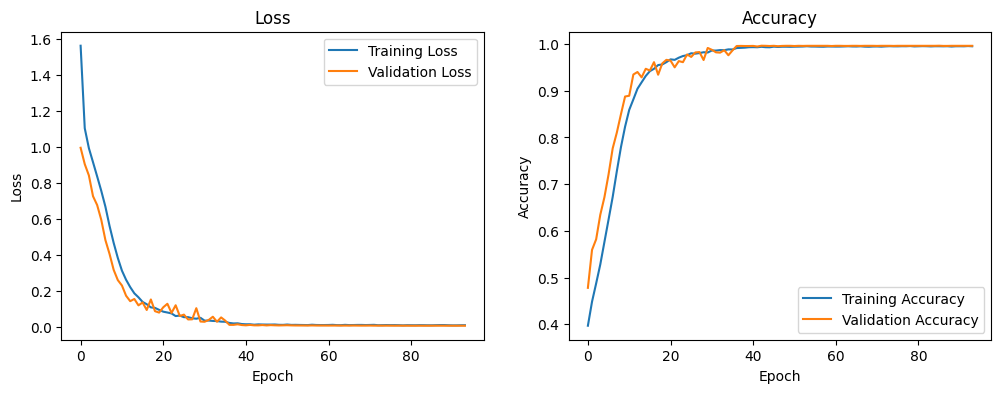

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight

# === 4. Загрузка и предобработка изображений для обучения ===
def load_and_preprocess_image(path, img_size=128):  # Изменено на 128
    """Загружает и нормализует изображение."""
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))  # Теперь 128x128
    img = img.astype('float32') / 255.0  # Нормализация в диапазон [0, 1]
    img = np.expand_dims(img, axis=-1)  # (128, 128, 1)
    return img

print("\nЗагрузка изображений для обучения...")
X_train = np.array([load_and_preprocess_image(p) for p in all_train_paths])
X_test = np.array([load_and_preprocess_image(p) for p in all_test_paths])

# Преобразование меток в числа
label_to_idx = {name: idx for idx, name in enumerate(CLASS_NAMES)}
y_train = np.array([label_to_idx[label] for label in all_train_labels])
y_test = np.array([label_to_idx[label] for label in all_test_labels])

print(f"Размер X_train: {X_train.shape}")  # Теперь (N, 128, 128, 1)
print(f"Размер X_test:  {X_test.shape}")   # Теперь (M, 128, 128, 1)

# Вычисление весов классов для балансировки
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# === 5. Визуализация примеров ===
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, class_name in enumerate(CLASS_NAMES):
    idx = next(i for i, label in enumerate(all_train_labels) if label == class_name)
    axes[i].imshow(X_train[idx].squeeze(), cmap='gray')
    axes[i].set_title(f'{class_name}')
    axes[i].axis('off')
plt.suptitle("Примеры изображений из обучающей выборки")
plt.show()

# === 6. Построение улучшенной модели CNN ===
def create_model(img_size=128, n_classes=3):  # Изменено на 128
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),  # (128,128,1)
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),  # Дополнительно: ещё слой с бóльшим числом фильтров
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),  # Теперь pooling снизит размер до (8,8,256)

        layers.Flatten(),
        layers.Dense(256, activation='relu'),  # Увеличен размер скрытого слоя
        layers.Dropout(0.7),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(n_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Создание модели
model = create_model()

# === 7. Обучение модели с обратным вызовом (callbacks) ===
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-7
    )
]

# Разделение данных на train и validation
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Обучение модели
history = model.fit(
    X_train_split, y_train_split,
    batch_size=32,
    epochs=100,
    validation_data=(X_val_split, y_val_split),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# === 8. Оценка модели на тестовом наборе ===
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nТестовая точность: {test_accuracy:.4f}")

# Сохранение модели
model.save('my_model.keras')
print("Модель сохранена как 'my_model.keras'")

# Автоматически запускаем скачивание
import os
try:
    from google.colab import files
    if os.path.exists('my_model.keras'):
        files.download('my_model.keras')
        print("Загрузка файла начата!")
    else:
        print("Ошибка: файл не найден")
except ImportError:
    print("Файлы не могут быть скачаны (не в Google Colab)")

# Визуализация истории обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*Опознование геометрических фигур*

Saving my_model.keras to my_model.keras


Saving Square_ffee8536-2a85-11ea-8123-8363a7ec19e6.png to Square_ffee8536-2a85-11ea-8123-8363a7ec19e6.png
Загрузка модели...
Модель загружена успешно.

Анализ изображения...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
Результат:
  Класс: Квадрат
  Уверенность: 1.0000
  Сырые предсказания (Круг/Квадрат/Треугольник): [1.4804761656422612e-24, 1.0, 1.0120509356198153e-21]


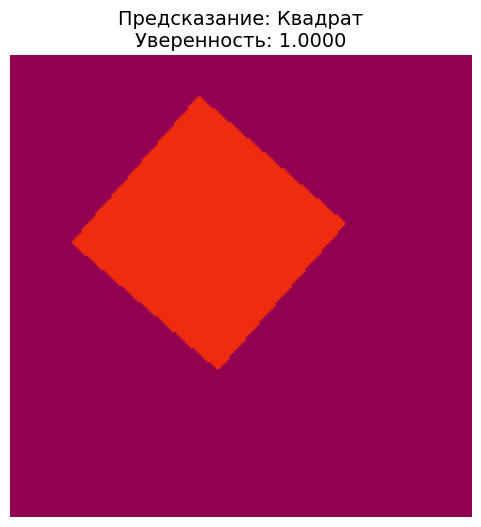

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from google.colab import files

def preprocess_image(image_path, img_size=128):
    """Предобработка изображения."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Не удалось загрузить изображение: {image_path}")

    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)
    return img

def predict_shape(model, image_path, img_size=128, threshold=0.85):
    """
    Предсказывает класс фигуры (Круг, Квадрат, Треугольник) с проверкой на «неизвестность».
    :param threshold: порог уверенности (если ниже — считаем «не фигурой»)
    :return: словарь с результатами или None, если фигура не распознана
    """
    processed_img = preprocess_image(image_path, img_size)
    prediction = model.predict(processed_img)[0]  # вектор вероятностей [p_круг, p_квадрат, p_треугольник]

    # Находим класс с максимальной уверенностью
    max_confidence = np.max(prediction)
    predicted_class = np.argmax(prediction)

    # Сопоставляем индекс с меткой
    labels = ['Круг', 'Квадрат', 'Треугольник']
    label = labels[predicted_class]

    # Проверка на низкую уверенность
    if max_confidence < threshold:
        return {
            'label': 'Неизвестно',
            'confidence': float(max_confidence),
            'raw_prediction': prediction.tolist(),
            'error': 'Низкая уверенность: изображение не похоже на круг, квадрат или треугольник'
        }

    return {
        'label': label,
        'confidence': float(max_confidence),
        'raw_prediction': prediction.tolist(),
        'error': None
    }

def visualize_prediction(image_path, result):
    """Визуализация с учётом ошибки."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)

    if result['error']:
        title = f"Результат: {result['label']}\n{result['error']}"
        plt.title(title, color='red', fontsize=12)
    else:
        title = f"Предсказание: {result['label']}\nУверенность: {result['confidence']:.4f}"
        plt.title(title, fontsize=14)

    plt.axis('off')
    plt.show()

# --- Основной код ---
if __name__ == '__main__':
    uploaded1 = files.upload()
    MODEL_PATH = next(iter(uploaded1.keys()))

    # Загрузка изображения через интерфейс Colab
    uploaded = files.upload()
    IMAGE_PATH = next(iter(uploaded.keys()))

    IMG_SIZE = 128
    CONFIDENCE_THRESHOLD = 0.85  # Порог уверенности (85%)

    # 1. Проверка существования файлов
    if not os.path.exists(MODEL_PATH):
        print(f"Ошибка: модель не найдена: {MODEL_PATH}")
        exit(1)
    if not os.path.exists(IMAGE_PATH):
        print(f"Ошибка: изображение не найдено: {IMAGE_PATH}")
        exit(1)

    # 2. Загрузка модели
    print("Загрузка модели...")
    try:
        model = keras.models.load_model(MODEL_PATH)
        print("Модель загружена успешно.")
    except Exception as e:
        print(f"Ошибка при загрузке модели: {e}")
        exit(1)

    # 3. Предсказание
    print("\nАнализ изображения...")
    try:
        result = predict_shape(model, IMAGE_PATH, IMG_SIZE, CONFIDENCE_THRESHOLD)

        if result['error']:
            print(f"РЕЗУЛЬТАТ: {result['label']}")
            print(f"Ошибка: {result['error']}")
            print(f"Уверенность: {result['confidence']:.4f}")
        else:
            print(f"Результат:")
            print(f"  Класс: {result['label']}")
            print(f"  Уверенность: {result['confidence']:.4f}")
            print(f"  Сырые предсказания (Круг/Квадрат/Треугольник): {result['raw_prediction']}")

    except Exception as e:
        print(f"Ошибка при обработке изображения: {e}")
        exit(1)

    # 4. Визуализация
    visualize_prediction(IMAGE_PATH, result)